<a href="https://colab.research.google.com/github/TonyN2060/Phase4-Project-Image-Classification-with-Deep-Learning/blob/main/Phase4Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project Submission** **- Phase 4**
**Student name:** GROUP 1

**Members:** Wambui Thuku, Wilfred Njagi, Muthoni Kahura, Kenneth Kimani, Cynthia Nasimiyu, Tony Munene,Bryan Okwach

**Student pace:** Part Time

**Scheduled project review date/time:** 30th August 2023

# **Business Understanding**
**Project Overview:**
This project aims to develop a deep neural network model that can accurately classify whether a pediatric patient has pneumonia or not, based on chest X-ray images. This project aims to showcase the practical application of deep learning in the medical domain, specifically in diagnosing pneumonia using medical images. The project is focused on achieving a proof of concept and demonstrating the ability to iterate and improve the model's performance.

### **What is Pneumonia?**

Pneumonia is an infection caused by bacteria, viruses, or fungi. It leads to inflammation in the air sacs of one or both lungs. These sacs, called alveoli, fill with fluid or pus, making it difficult to breathe. Pneumonia can range in seriousness from mild to life-threatening. It is most serious for infants and young children, people older than age 65, and people with health problems or weakened immune systems. Chest X-ray, blood tests, and culture of the sputum may help confirm the diagnosis. The disease may be classified by where it was acquired, such as community- or hospital-acquired or healthcare-associated pneumonia.

**Symptoms**
The signs and symptoms of pneumonia vary from mild to severe, depending on factors such as the type of germ causing the infection, and your age and overall health. Mild signs and symptoms often are similar to those of a cold or flu, but they last longer.

Signs and symptoms of pneumonia may include:
*   Chest pain when you breathe or cough
*   Confusion or changes in mental awareness (in adults age 65 and older)
*   Cough, which may produce phlegm
*   Fatigue
*   Fever, sweating and shaking chills
*   Lower than normal body temperature (in adults older than age 65 and people with weak immune systems)
*   Nausea, vomiting or diarrhea
*   Shortness of breath

## **Problem statement**


Pneumonia stands as a significant health concern among pediatric patients, necessitating prompt diagnosis for effective treatment. However, conventional diagnostic methods suffer from time constraints and human fallibility. The integration of deep learning and image classification techniques holds the promise of expediting diagnosis while augmenting accuracy, ultimately enhancing patient outcomes. Despite being the most widely conducted imaging procedure globally, chest radiography (CXR) remains susceptible to interpretation errors, which can lead to severe repercussions for patients and even prompt medical malpractice litigation. The escalating global issue of antibiotic resistance, largely stemming from the overuse or misapplication of antibiotics, is further exacerbated by misdiagnoses of chest X-ray results. In this context, computer-aided diagnosis systems emerge as a potential avenue for elevating diagnostic precision, thus addressing these pressing challenges in the realm of pediatric pneumonia diagnosis.

**Objective**

*   The primary objective of this project is to create a binary classification model that can distinguish between chest X-ray images of patients with pneumonia and those without pneumonia. Given the complexity of medical image analysis, this task poses a significant challenge, requiring the development of a robust and accurate model.





#**Data Understanding**

The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).

Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.

For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.

### **Methodology**
The project will involve several key steps:

##### **Data Preprocessing:**
Load and preprocess the chest X-ray images, including resizing, normalization, and data augmentation techniques to enhance the model's generalization.
##### **Model Selection:**
Explore various convolutional neural network (CNN) architectures suitable for image classification tasks. Choose the best architecture based on performance and computational requirements.
##### **Model Training:**
Train the selected model on the preprocessed training data using appropriate loss functions and optimizers.
##### **Model Evaluation:**
In order to enhance the model's performance, several parameter adjustments were implemented. The first technique to be introduced was 'early stopping, the second enhancement involved the integration of an optimizer into the model, the dropout regularization technique was employed to mitigate overfitting. Lastly, transfer learning using the architecture—a pre-trained deep neural network model

##### **Prediction**
We used two images( Normal and Pneumonia) to see the model's predictive abilities

### **Ethical Considerations**
Ensure patient data privacy and the responsible use of the model's predictions. Address any biases that may arise from the training data to prevent discriminatory outcomes.




By successfully building a pneumonia detection model, this project aims to contribute to the field of medical diagnostics by providing an automated tool to assist medical professionals in detecting pneumonia early and accurately. This project showcases the potential of machine learning in improving healthcare outcomes while emphasizing the need for ethical and responsible implementation.

In [ ]:
#import relevant libraries
import os
import cv2
import matplotlib.pyplot as plt
import random
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import tensorflow as tf
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from keras import regularizers
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3, MobileNetV2, DenseNet121
from tensorflow.keras.optimizers import Adam
from itertools import chain
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define paths
train_dir = '/content/drive/MyDrive/chest_xray/train'
val_dir = '/content/drive/MyDrive/chest_xray/val'
test_dir = '/content/drive/MyDrive/chest_xray/test'

Checking the number of images in the train, test, and validation sets

In [ ]:
train_normal_count = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
train_pneumonia_count = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
val_normal_count = len(os.listdir(os.path.join(val_dir, 'NORMAL')))
val_pneumonia_count = len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))
test_normal_count = len(os.listdir(os.path.join(test_dir, 'NORMAL')))
test_pneumonia_count = len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))

print("Train Data:")
print(f"Normal Images: {train_normal_count}")
print(f"Pneumonia Images: {train_pneumonia_count}")

print("\nValidation Data:")
print(f"Normal Images: {val_normal_count}")
print(f"Pneumonia Images: {val_pneumonia_count}")

print("\nTest Data:")
print(f"Normal Images: {test_normal_count}")
print(f"Pneumonia Images: {test_pneumonia_count}")

Train Data:
Normal Images: 1341
Pneumonia Images: 3882

Validation Data:
Normal Images: 8
Pneumonia Images: 8

Test Data:
Normal Images: 234
Pneumonia Images: 390


 ## Exploratory Data Analysis (EDA)

**1. Class Distribution**

Checking the distribution of images across classes (normal vs. pneumonia). This helps you understand if the classes are imbalanced.

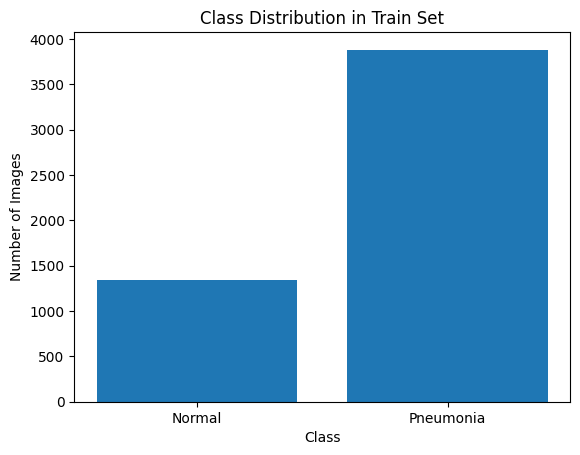

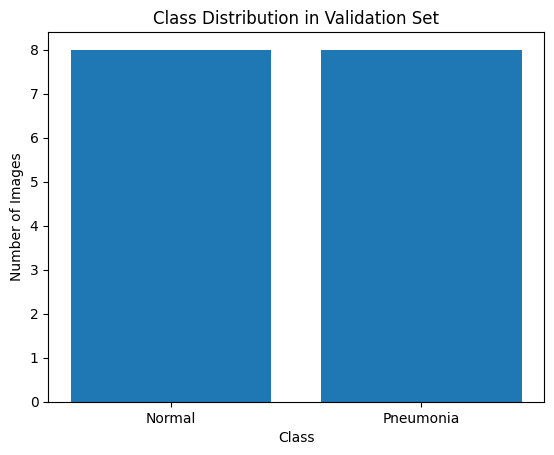

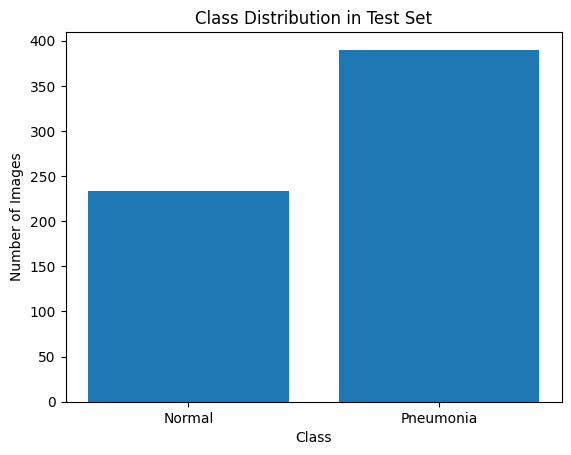

In [ ]:
# Function to plot class distribution
def plot_class_distribution(normal_count, pneumonia_count, set_name):
    plt.bar(['Normal', 'Pneumonia'], [normal_count, pneumonia_count])
    plt.xlabel('Class')
    plt.ylabel('Number of Images')
    plt.title(f'Class Distribution in {set_name} Set')
    plt.show()

# Plot class distribution for each set
plot_class_distribution(train_normal_count, train_pneumonia_count, 'Train')
plot_class_distribution(val_normal_count, val_pneumonia_count, 'Validation')
plot_class_distribution(test_normal_count, test_pneumonia_count, 'Test')

* The training set seems to have an imbalanced class distribution, with significantly more pneumonia images than normal images.
* The validation set appears to have a very small number of images for both classes. This could potentially affect the model's ability to generalize effectively.
* The test set seems to have a more balanced distribution compared to the training set, with a relatively smaller number of pneumonia images compared to normal images.

**2. Sample Images**

Visualization of a few sample images from each class to get an idea of the data.

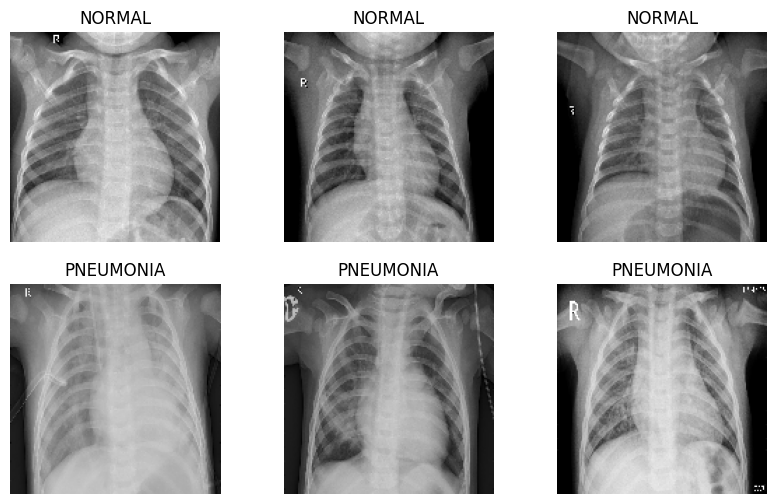

In [ ]:
# Select random samples from both classes
normal_samples = random.sample(os.listdir(os.path.join(train_dir, 'NORMAL')), 3)
pneumonia_samples = random.sample(os.listdir(os.path.join(train_dir, 'PNEUMONIA')), 3)

# Display sample images
plt.figure(figsize=(10, 6))
for i, img_name in enumerate(normal_samples + pneumonia_samples):
    img_path = os.path.join(train_dir, 'NORMAL', img_name) if i < 3 else os.path.join(train_dir, 'PNEUMONIA', img_name)
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title('NORMAL' if i < 3 else 'PNEUMONIA')
plt.show()


* Normal images show healthy lungs without any signs of infection or abnormalities. Lung structures are well-defined, and the diaphragm appears intact.
* Pneumonia images depict lung infections with visible signs such as white patches (consolidation), increased density, hazy lung tissue (infiltrates), and more visible airways (air bronchograms).

**3. Image Dimensions**

Checking the dimensions of the images to ensure they are consistent and suitable for the model.

In [ ]:
#GENERATING SAMPLE IMAGE DIMENSIONS
# Define the subdirectories
subdirectories = [train_dir, val_dir, test_dir]

# Initialize a dictionary to store image dimensions for each subset
image_dimensions = {}

# Loop through subsets
for subset_dir in subdirectories:
    subset_name = os.path.basename(subset_dir)
    classes = os.listdir(subset_dir)

    subset_dimensions = {}

    # Loop through classes
    for class_name in classes:
        class_dir = os.path.join(subset_dir, class_name)
        sample_images = os.listdir(class_dir)

        class_dimensions = []

        # Loop through a subset of images (e.g., first 5)
        for image_name in sample_images[:5]:
            image_path = os.path.join(class_dir, image_name)
            img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            height, width = img.shape[:2]
            class_dimensions.append((width, height))

        subset_dimensions[class_name] = class_dimensions

    image_dimensions[subset_name] = subset_dimensions

# Print a sample of image dimensions
for subset_name, subset_dimensions in image_dimensions.items():
    print(f"Subset: {subset_name}")
    for class_name, dimensions in subset_dimensions.items():
        print(f"Class: {class_name}")
        for width, height in dimensions:
            print(f"Image dimensions: {width} x {height}")


Subset: train
Class: NORMAL
Image dimensions: 1268 x 1017
Image dimensions: 1628 x 1167
Image dimensions: 1902 x 1595
Image dimensions: 1418 x 1024
Image dimensions: 1670 x 1344
Class: PNEUMONIA
Image dimensions: 1112 x 784
Image dimensions: 845 x 556
Image dimensions: 920 x 736
Image dimensions: 1608 x 1392
Image dimensions: 1056 x 616
Subset: val
Class: NORMAL
Image dimensions: 1776 x 1416
Image dimensions: 1736 x 1416
Image dimensions: 1272 x 1040
Image dimensions: 1240 x 1104
Image dimensions: 1288 x 928
Class: PNEUMONIA
Image dimensions: 1192 x 952
Image dimensions: 1016 x 656
Image dimensions: 1256 x 864
Image dimensions: 968 x 592
Image dimensions: 1416 x 944
Subset: test
Class: NORMAL
Image dimensions: 2498 x 2057
Image dimensions: 1803 x 1238
Image dimensions: 2144 x 1916
Image dimensions: 1852 x 1443
Image dimensions: 2214 x 1945
Class: PNEUMONIA
Image dimensions: 1106 x 762
Image dimensions: 1322 x 736
Image dimensions: 976 x 696
Image dimensions: 888 x 536
Image dimensions:

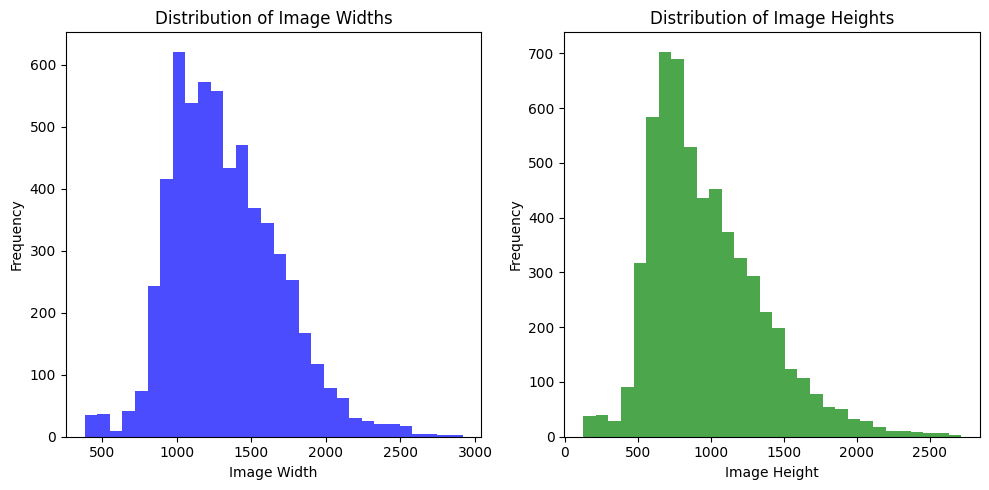

In [ ]:
# Define the subdirectories
subdirectories = [train_dir, val_dir, test_dir]

# Initialize lists to store image dimensions
all_widths = []
all_heights = []

# Loop through subsets
for subset_dir in subdirectories:
    subset_name = os.path.basename(subset_dir)
    classes = os.listdir(subset_dir)

    # Loop through classes
    for class_name in classes:
        class_dir = os.path.join(subset_dir, class_name)
        sample_images = os.listdir(class_dir)

        # Loop through a subset of images
        for image_name in sample_images:
            image_path = os.path.join(class_dir, image_name)
            img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            height, width = img.shape[:2]
            all_widths.append(width)
            all_heights.append(height)

# Plot the distribution of image widths
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(all_widths, bins=30, color='blue', alpha=0.7)
plt.xlabel('Image Width')
plt.ylabel('Frequency')
plt.title('Distribution of Image Widths')

# Plot the distribution of image heights
plt.subplot(1, 2, 2)
plt.hist(all_heights, bins=30, color='green', alpha=0.7)
plt.xlabel('Image Height')
plt.ylabel('Frequency')
plt.title('Distribution of Image Heights')

plt.tight_layout()
plt.show()


The images have different widths ranging from 250 to 2500 with outliers and heights ranging from 100 to 2500 with outliers as shown in the above distributions

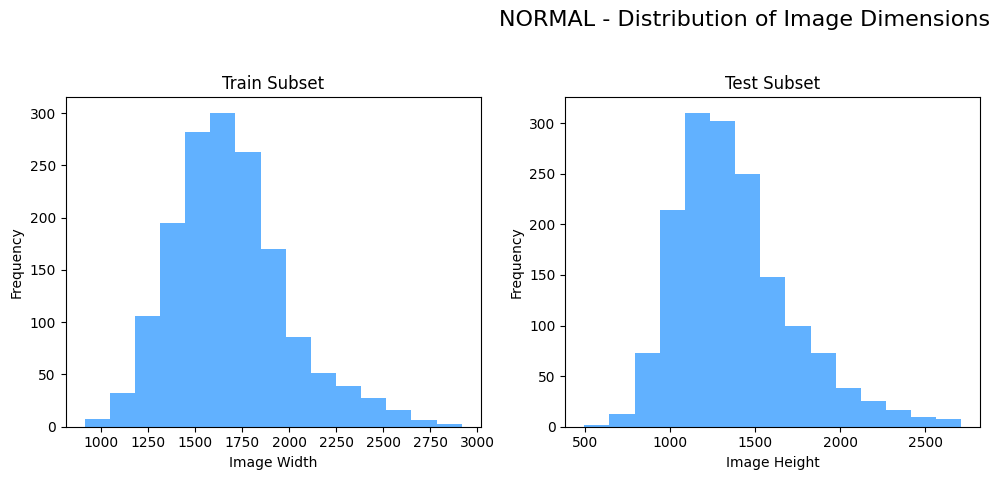

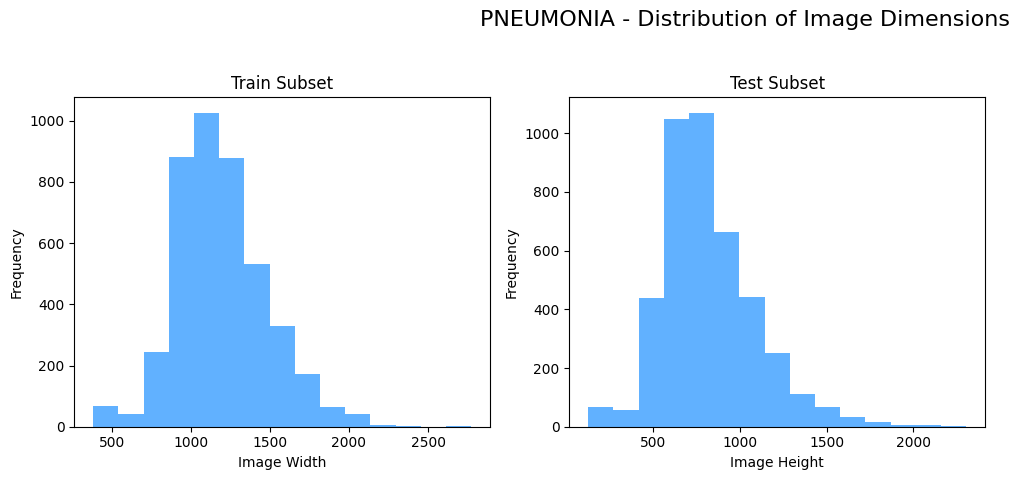

In [ ]:
# SHOWING IMAGE DIMENSIONS IN TRAIN AND VALIDATION SETS
subset_names = ["Train", "Test", "Validation"]
# Initialize dictionaries to store image dimensions for each class
class_dimensions = {}

# Loop through subsets
for subset_dir, subset_name in zip(subdirectories, subset_names):
    classes = os.listdir(subset_dir)

    # Loop through classes
    for class_name in classes:
        class_dir = os.path.join(subset_dir, class_name)
        sample_images = os.listdir(class_dir)

        # Loop through a subset of images
        for image_name in sample_images:
            image_path = os.path.join(class_dir, image_name)
            img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            height, width = img.shape[:2]

            if class_name not in class_dimensions:
                class_dimensions[class_name] = {'Width': [], 'Height': []}

            class_dimensions[class_name]['Width'].append(width)
            class_dimensions[class_name]['Height'].append(height)

# Plot the distribution of image dimensions per class for each subset
for class_name, dimensions in class_dimensions.items():
    plt.figure(figsize=(15, 5))
    plt.suptitle(f'{class_name} - Distribution of Image Dimensions', fontsize=16)

    for i, (subset_name, subset_dims) in enumerate(zip(subset_names, ['Width', 'Height'])):
        plt.subplot(1, 3, i + 1)
        plt.hist(dimensions[subset_dims], bins=15, color='dodgerblue', alpha=0.7)
        plt.xlabel(f'Image {subset_dims}')
        plt.ylabel('Frequency')
        plt.title(f'{subset_name} Subset')
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    plt.show()


The Normal(without pneumonia) images seem to have higher dimensions especially in width compared to the Pneumonia images. In the above histograms the frequency of the images are not the same for all the images and the dimensions seem to be different.This means that we will have to determine a common target size that's compatible with the model we plan to use.

**4. Pixel Intensity Distribution**

Analyzing the pixel intensity distribution to check if there are any variations or anomalies.

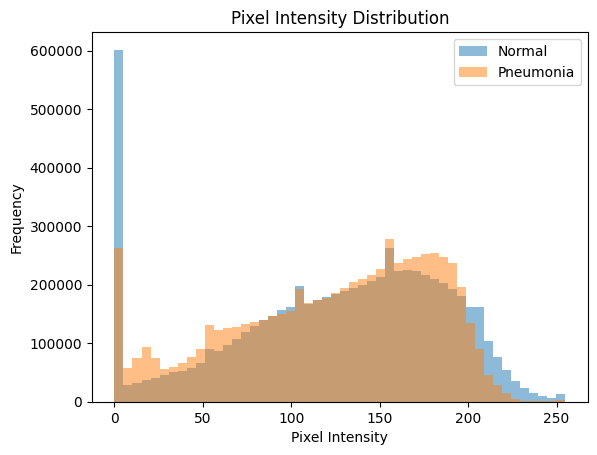

In [ ]:
def load_and_flatten_images(directory, class_name, sample_size):
    pixel_values = []
    for img_name in os.listdir(os.path.join(directory, class_name))[:sample_size]:
        img_path = os.path.join(directory, class_name, img_name)
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        pixel_values.extend(img_array.flatten())
    return pixel_values

sample_size = 100  # Number of images to sample
normal_pixel_values = load_and_flatten_images(train_dir, 'NORMAL', sample_size)
pneumonia_pixel_values = load_and_flatten_images(train_dir, 'PNEUMONIA', sample_size)

# Plot the pixel intensity distribution for both classes
plt.hist(normal_pixel_values, bins=50, alpha=0.5, label='Normal')
plt.hist(pneumonia_pixel_values, bins=50, alpha=0.5, label='Pneumonia')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Pixel Intensity Distribution')
plt.legend()
plt.show()



* Based on the histogram results, there is a wide distribution which indicates higher contrast and diverse intensity values.
* The 'Normal' class images exhibit a diverse range of pixel intensities while the 'Pneumonia' class images show higher intensities due to areas of opacity.



#**Data Preparation**

## Data augmentation and preprocessing

**1. Data Augmentation**

In the below we will perform data augmentation in order to introduce diversity into our training data, making the model less likely to overfit and more likely to generalize to unseen data.

In [ ]:
# Data augmentation and preprocessing for the training set
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'  # How to fill newly created pixels
)

# Data preprocessing for the validation and test sets (only rescaling)
val_test_datagen = ImageDataGenerator(rescale=1.0/255)

# Create generators
batch_size = 32
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='binary'
)


Found 5223 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


The validation and test data generators are created with only rescaling as they shouldn't undergo data augmentation.

**2. Handling Class Imbalance**

We will use class weights to give more importance to the underrepresented class.

In [ ]:
class_weights = compute_class_weight('balanced', classes=np.unique(train_generator.classes), y=train_generator.classes)
class_weights_dict = dict(enumerate(class_weights))

During model training, we will pass class_weight=class_weights_dict to the fit function.

**3. Resizing Images**

Below we will resize the images to a consistent size that our model can handle efficiently.

Found 5223 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


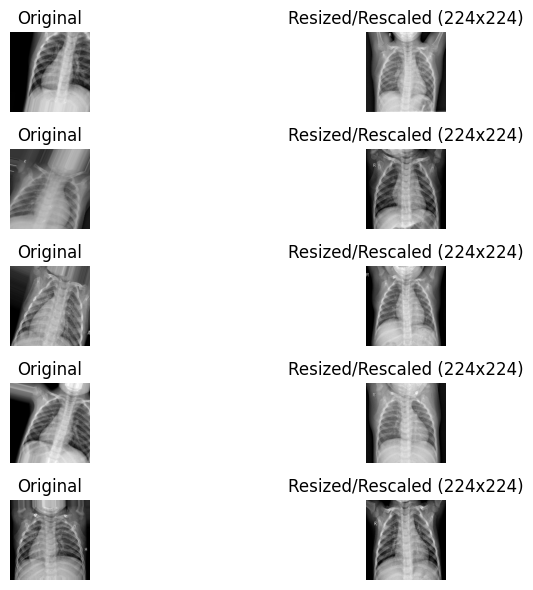

In [ ]:
target_size = (224, 224)

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Display a few samples of resized images in comparison to the previous images
sample_images = []

for _ in range(5):  # Display 5 samples
    batch = train_generator.next()
    original_image = batch[0][0]  # First image in the batch
    resized_image = tf.keras.preprocessing.image.load_img(
        os.path.join(train_dir, train_generator.filenames[train_generator.batch_index - 1]),
        target_size=target_size
    )
    sample_images.append((original_image, resized_image))

# Plot the sample images
plt.figure(figsize=(10, 6))
for i, (original, resized) in enumerate(sample_images, start=1):
    plt.subplot(5, 2, i*2-1)
    plt.imshow(original)
    plt.axis('off')
    plt.title('Original')

    plt.subplot(5, 2, i*2)
    plt.imshow(resized)
    plt.axis('off')
    plt.title('Resized/Rescaled (224x224)')
plt.tight_layout()
plt.show()

**4. Standardization**

We will perform standardization to bring the pixel values to a similar scale. This will be done by subtracting the mean and dividing by the standard deviation.


#**Modelling**

### **Model 1: Baseline CNN**
**Model Architecture:** The model architecture defined here is a convolutional neural network (CNN) commonly used for image classification tasks. It's a stack of convolutional layers followed by max-pooling layers to extract features from the images. The fully connected layers at the end of the model make predictions based on the extracted features.

**Convolutional Layers:** The model starts with four sets of convolutional (Conv2D) and max-pooling (MaxPooling2D) layers. Each convolutional layer learns different features from the input images. The number of filters (also known as output channels) increases from 32 to 128 as you go deeper into the network.

**Flatten Layer:** The output from the convolutional layers is flattened into a 1D vector before entering the fully connected layers.

**Fully Connected Layers:** The flattened vector is passed through a series of dense (Dense) layers, which are fully connected layers. The layers progressively reduce the number of units while increasing non-linearity using the ReLU activation function. The final dense layer has 2 units with a softmax activation function, which is suitable for binary classification.

**Model Compilation and Training:** In this code, the model is compiled with the SparseCategoricalCrossentropy loss function and accuracy as the evaluation metric. The SparseCategoricalCrossentropy loss is appropriate for the binary classification task because it can handle integer labels directly.

The model is then trained using the fit method. It's trained for **5 epoch**s using the data from the train_generator, and validation data from the validation_generator is used to monitor the model's performance during training.

In [ ]:
train_data_dir = '/content/drive/MyDrive/chest_xray/train'
validation_data_dir = '/content/drive/MyDrive/chest_xray/val'
test_data_dir = '/content/drive/MyDrive/chest_xray/test'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation and preprocessing settings
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values to [0, 1]
    rotation_range=20,  # Random rotation
    width_shift_range=0.2,  # Random horizontal shift
    height_shift_range=0.2,  # Random vertical shift
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Horizontal flip
    fill_mode='nearest'  # Filling mode for new pixels
)

val_datagen = ImageDataGenerator(
    rescale=1.0 / 255  # Normalize pixel values to [0, 1]
)

# Define data generators
train_generator = train_datagen.flow_from_directory(
    train_data_dir,  # Path to the training data directory
    target_size=(224, 224),  # Rescale images to this size
    batch_size=32,
    class_mode='binary'  # 'binary' for binary classification, 'categorical' for multiclass
)

validation_generator = val_datagen.flow_from_directory(
    validation_data_dir,  # Path to the validation data directory
    target_size=(224, 224),  # Rescale images to this size
    batch_size=16,
    class_mode='binary'  # 'binary' for binary classification, 'categorical' for multiclass
)

test_datagen = ImageDataGenerator(
    rescale=1.0 / 255  # Normalize pixel values to [0, 1]
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),  # Rescale images to this size
    batch_size=16,
    class_mode='binary'
)


Found 5223 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [ ]:

from tensorflow.keras.losses import SparseCategoricalCrossentropy

# Compile the model
model.compile(
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    epochs=5,
                    validation_data=validation_generator)


Epoch 1/5
164/164 [==============================] - 136s 736ms/step - loss: 0.5673 - accuracy: 0.7454 - val_loss: 0.5025 - val_accuracy: 0.7500
Epoch 2/5
164/164 [==============================] - 122s 744ms/step - loss: 0.3609 - accuracy: 0.8382 - val_loss: 0.9806 - val_accuracy: 0.6250
Epoch 3/5
164/164 [==============================] - 118s 718ms/step - loss: 0.3047 - accuracy: 0.8654 - val_loss: 0.5233 - val_accuracy: 0.7500
Epoch 4/5
164/164 [==============================] - 119s 726ms/step - loss: 0.2901 - accuracy: 0.8765 - val_loss: 0.6013 - val_accuracy: 0.6875
Epoch 5/5
164/164 [==============================] - 117s 715ms/step - loss: 0.2677 - accuracy: 0.8884 - val_loss: 0.6041 - val_accuracy: 0.6250


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

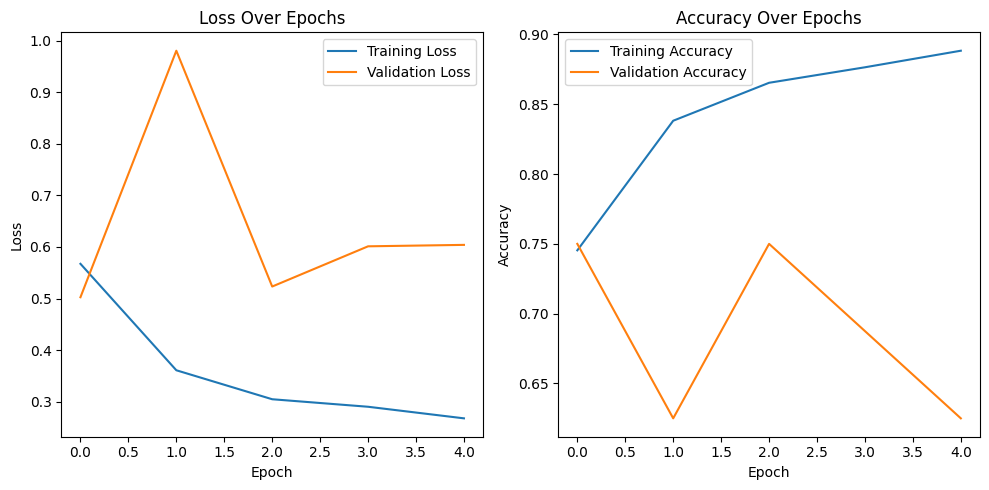

In [ ]:
import matplotlib.pyplot as plt

# Access the history object returned from model.fit()
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plot loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()


**Observation**
After analyzing the training progress, it's evident that the validation loss follows a descending trend initially but begins to rise after the third epoch. Similarly, the validation accuracy maintains stability and then declines following the third epoch.

**Further Improvements to the model:** In order to enhance the model's performance, several parameter adjustments will be implemented. The first technique to be introduced is *'early stopping,'* a strategy that entails vigilant monitoring of the model's performance on the validation dataset throughout training. If the observed performance ceases to improve or demonstrates signs of deterioration, the training process is ceased. The aim is to thwart the model from learning noise in the data and to select the point of optimal generalization. The second enhancement involves the *integration of an optimizer* into the model. Lastly, the *'dropout' regularization technique *will be employed to mitigate overfitting. This technique involves the random omission (i.e., setting to zero) of a specific percentage of neurons or units within a layer during both forward and backward passes of training. This measured exclusion fosters better generalization and improved resilience against overfitting.

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print("Original Model - Test Loss:", test_loss)
print("Original Model - Test Accuracy:", test_accuracy)

39/39 [==============================] - 9s 225ms/step - loss: 0.4213 - accuracy: 0.7772
Original Model - Test Loss: 0.42126357555389404
Original Model - Test Accuracy: 0.7772436141967773


**Observation:** The test accuracy is about 42% whereas the the test loss is about 78%. The test loss is quite high and the accuracy can be improved upon as well.

### **Model 2**
**The model architecture** consists of several convolutional layers followed by max-pooling layers to extract features from the images. After the convolutional layers, dropout layers are introduced to mitigate overfitting. Dropout randomly deactivates a certain percentage of neurons during each training epoch.

The final layers include fully connected (dense) layers with dropout regularization, followed by an output layer for binary classification. The softmax activation function is used for the output layer to provide class probabilities.

**Early Stopping** To prevent overfitting and improve efficiency, the model is trained with the early stopping technique. Early stopping monitors the validation loss and halts training if the loss doesn't improve over a certain number of epochs (patience). This helps the model to avoid excessive training that may lead to overfitting.

By incorporating dropout regularization and early stopping, this code aims to enhance the model's generalization and make it more robust to unseen data, improving its overall performance.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model2 = Sequential()
model2.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', input_shape=(224, 224, 3)))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Flatten())

# Fully connected layers with dropout regularization
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.5))

# Output layer for binary classification
model2.add(Dense(2, activation='softmax'))

# Compile the model
model2.compile(optimizer=Adam(learning_rate=0.001),
               loss=SparseCategoricalCrossentropy(),
               metrics=['accuracy'])

# Train the model with early stopping
history2 = model2.fit(train_generator,
                      epochs=7,
                      validation_data=validation_generator,
                      callbacks=[early_stopping])


Epoch 1/7
164/164 [==============================] - 120s 711ms/step - loss: 0.4986 - accuracy: 0.7438 - val_loss: 0.6470 - val_accuracy: 0.5000
Epoch 2/7
164/164 [==============================] - 120s 731ms/step - loss: 0.3740 - accuracy: 0.8150 - val_loss: 0.6068 - val_accuracy: 0.6250
Epoch 3/7
164/164 [==============================] - 125s 761ms/step - loss: 0.3124 - accuracy: 0.8621 - val_loss: 1.1661 - val_accuracy: 0.6875
Epoch 4/7
164/164 [==============================] - 116s 707ms/step - loss: 0.2884 - accuracy: 0.8794 - val_loss: 0.7492 - val_accuracy: 0.6250
Epoch 5/7
164/164 [==============================] - 117s 716ms/step - loss: 0.2823 - accuracy: 0.8771 - val_loss: 1.0615 - val_accuracy: 0.6250


In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 128)    0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 128)     147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 64)        73792     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 64)      

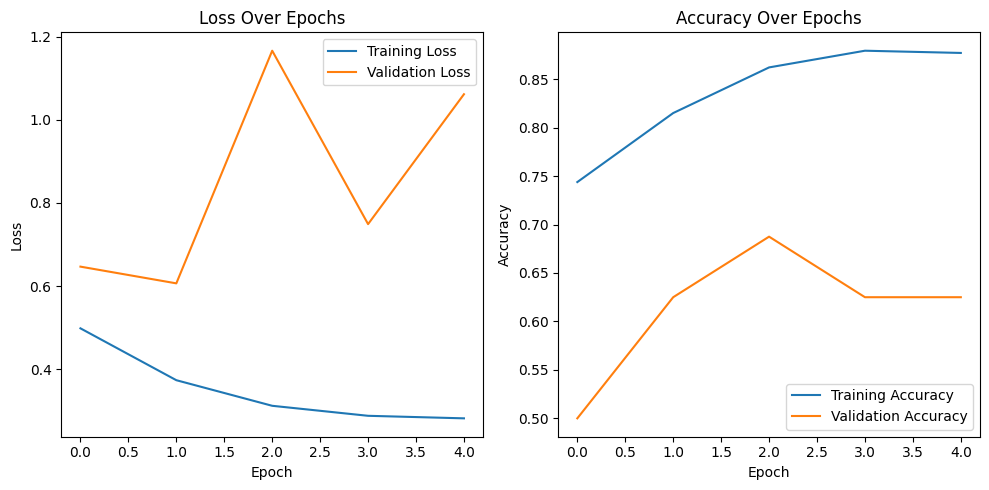

In [ ]:
# Access the history object returned from model.fit()
training_loss = history2.history['loss']
validation_loss = history2.history['val_loss']
training_accuracy = history2.history['accuracy']
validation_accuracy = history2.history['val_accuracy']

# Plot loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

**Observation:** Improvements are observed on both the loss and accuracy of both validation and training sets, this can be attributed to tuning our first model by adding an optimizer and two regularisation techniques, early stopping and dropout

In [ ]:
test_loss_2, test_accuracy_2 = model2.evaluate(test_generator)
print("Model_2 - Test Loss:", test_loss_2)
print("Model_2 - Test Accuracy:", test_accuracy_2)

39/39 [==============================] - 6s 146ms/step - loss: 0.4356 - accuracy: 0.7997
Model_2 - Test Loss: 0.43557998538017273
Model_2 - Test Accuracy: 0.7996794581413269


### **Model 3**
**Transfer Learning with VGG16 for Image Classification.**

This code demonstrates the concept of transfer learning using the **VGG16** architecture—a pre-trained deep neural network model. Transfer learning allows leveraging the knowledge gained from a model trained on a large dataset (ImageNet) to improve performance on a different but related task.

**Model Architecture:** The VGG16 model is loaded with pre-trained weights from ImageNet. The base model's layers are frozen to retain the learned features. A custom architecture is built on top of the base model. A Global Average Pooling layer is added to condense the spatial dimensions of the feature maps. Then, several dense (fully connected) layers are introduced to make predictions. The final layer uses the softmax activation function for binary classification.

**Freezing Layers:** The layers of the pre-trained base model are set to be non-trainable, effectively fixing their weights during training. This way, the model focuses on learning relevant features for the new task while retaining the general image understanding from ImageNet.

**Training and Early Stopping:** The model is compiled with an Adam optimizer and Sparse Categorical Crossentropy loss function. During training, an early stopping callback is employed to halt the training process if validation loss stops improving over a certain number of epochs.

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D

# Load the pre-trained VGG16 model with imagenet weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model by adding custom layers on top of the base model
model3 = Sequential()
model3.add(base_model)
model3.add(GlobalAveragePooling2D())
model3.add(Dense(256, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(2, activation='softmax'))

# Compile the model
model3.compile(optimizer=Adam(learning_rate=0.001),
               loss=SparseCategoricalCrossentropy(),
               metrics=['accuracy'])

# Train the model
history3 = model3.fit(train_generator,
                      epochs=10,
                      validation_data=validation_generator,
                      callbacks=[early_stopping])


58889256/58889256 [==============================] - 3s 0us/step
Epoch 1/10
164/164 [==============================] - 142s 822ms/step - loss: 0.2967 - accuracy: 0.8643 - val_loss: 0.4219 - val_accuracy: 0.8125
Epoch 2/10
164/164 [==============================] - 117s 715ms/step - loss: 0.2214 - accuracy: 0.9091 - val_loss: 0.4139 - val_accuracy: 0.7500
Epoch 3/10
164/164 [==============================] - 116s 705ms/step - loss: 0.1929 - accuracy: 0.9223 - val_loss: 0.4242 - val_accuracy: 0.6875
Epoch 4/10
164/164 [==============================] - 123s 747ms/step - loss: 0.1901 - accuracy: 0.9236 - val_loss: 0.4988 - val_accuracy: 0.7500
Epoch 5/10
164/164 [==============================] - 126s 767ms/step - loss: 0.1640 - accuracy: 0.9357 - val_loss: 0.5842 - val_accuracy: 0.7500


In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 2)                 130       
                                                      

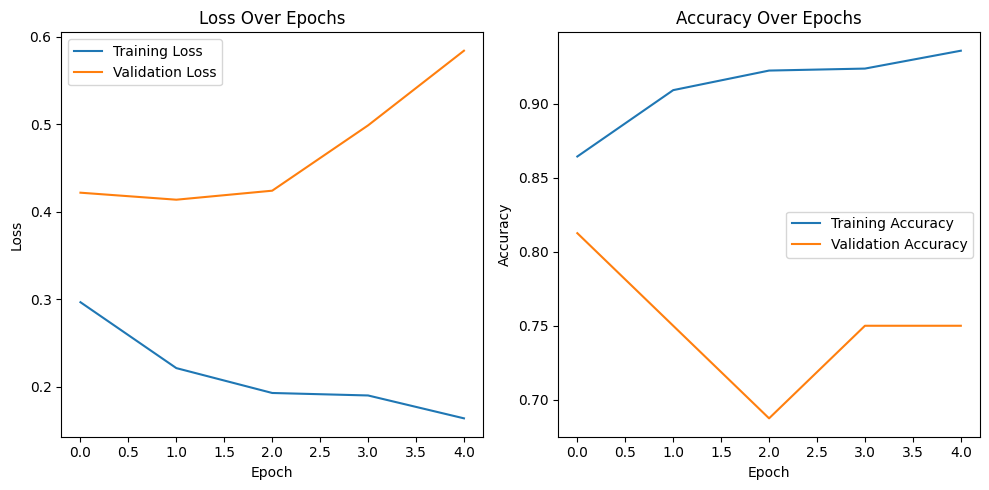

In [ ]:
# Access the history object returned from model.fit()
training_loss = history3.history['loss']
validation_loss = history3.history['val_loss']
training_accuracy = history3.history['accuracy']
validation_accuracy = history3.history['val_accuracy']

# Plot loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

**Observation:** The pretrained model far supersedes our previous models in terms of minimising the loss, but is slightly edged out in terms of validation accuracy by our second model. A steady general drop is observed in the validation and training loss and a general improvement is observed on the validation and training accuracy. We shall then compare the test perfomance of all 3

In [ ]:
test_loss_3, test_accuracy_3 = model3.evaluate(test_generator)
print(" Model_3 - Test Loss:", test_loss_3)
print(" Model_3 - Test Accuracy:", test_accuracy_3)

39/39 [==============================] - 7s 185ms/step - loss: 0.2801 - accuracy: 0.8798
 Model_3 - Test Loss: 0.28011810779571533
 Model_3 - Test Accuracy: 0.879807710647583


### **Comparison between the three models**

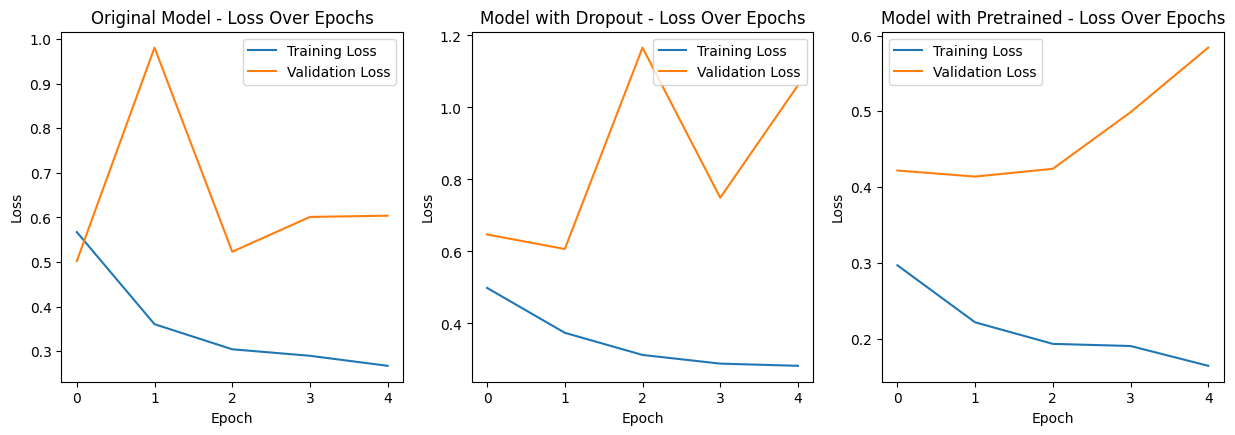

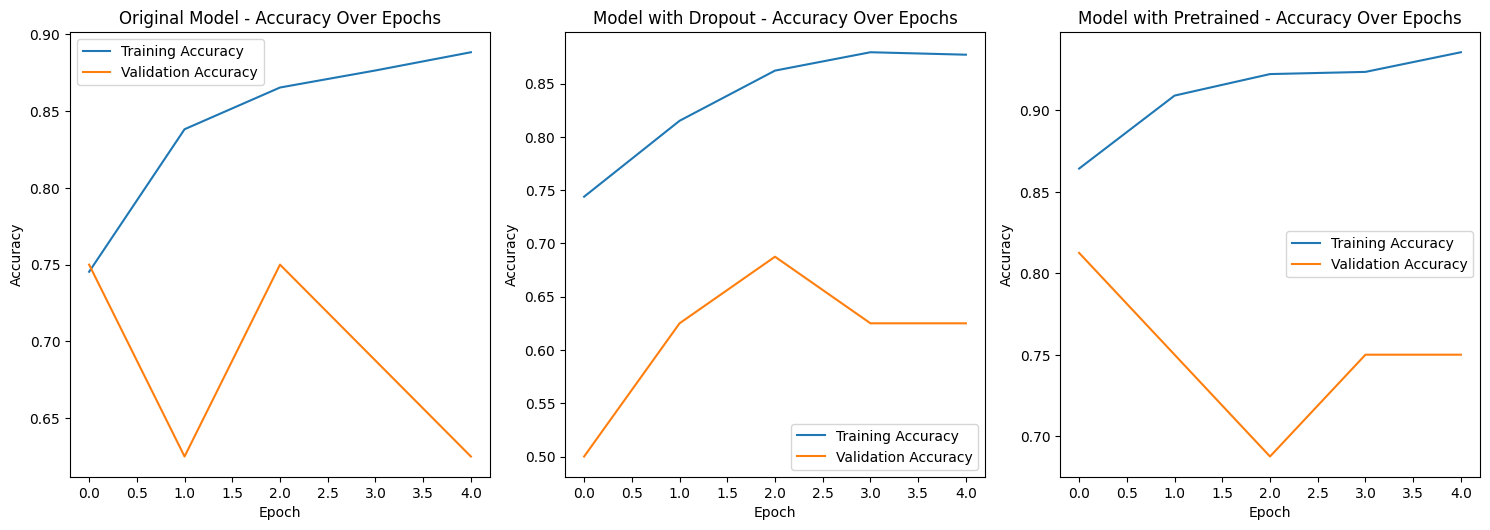

In [ ]:
import matplotlib.pyplot as plt

# Get loss and accuracy data for all three models
models = [(history, 'Original Model'), (history2, 'Model with Dropout'), (history3, 'Model with Pretrained')]

# Plot loss for all models
plt.figure(figsize=(15, 10))

for i, (model_history, model_name) in enumerate(models):
    plt.subplot(2, 3, i + 1)
    plt.plot(model_history.history['loss'], label='Training Loss')
    plt.plot(model_history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'{model_name} - Loss Over Epochs')
    plt.legend()

# Plot accuracy for all models
plt.figure(figsize=(15, 10))

for i, (model_history, model_name) in enumerate(models):
    plt.subplot(2, 3, i + 1)
    plt.plot(model_history.history['accuracy'], label='Training Accuracy')
    plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} - Accuracy Over Epochs')
    plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
#visualising test loss and accuracy across all 3 models
# Store the test loss and accuracy in separate variables
test_loss_original_model = test_loss
test_accuracy_original_model = test_accuracy

test_loss_model_with_dropout = test_loss_2
test_accuracy_model_with_dropout = test_accuracy_2

test_loss_model_with_pretrained = test_loss_3
test_accuracy_model_with_pretrained = test_accuracy_3

# Alternatively, you can store the values in dictionaries
test_results = {
    "Original Model": {"loss": test_loss, "accuracy": test_accuracy},
    "Model with Dropout": {"loss": test_loss_2, "accuracy": test_accuracy_2},
    "Model with Pretrained": {"loss": test_loss_3, "accuracy": test_accuracy_3}
}

# Accessing test results using dictionaries
print("Test Loss for Original Model:", test_results["Original Model"]["loss"])
print("Test Accuracy for Model with Dropout:", test_results["Model with Dropout"]["accuracy"])
print("Test Loss for Model with Pretrained:", test_results["Model with Pretrained"]["loss"])


Test Loss for Original Model: 0.42126357555389404
Test Accuracy for Model with Dropout: 0.7996794581413269
Test Loss for Model with Pretrained: 0.28011810779571533


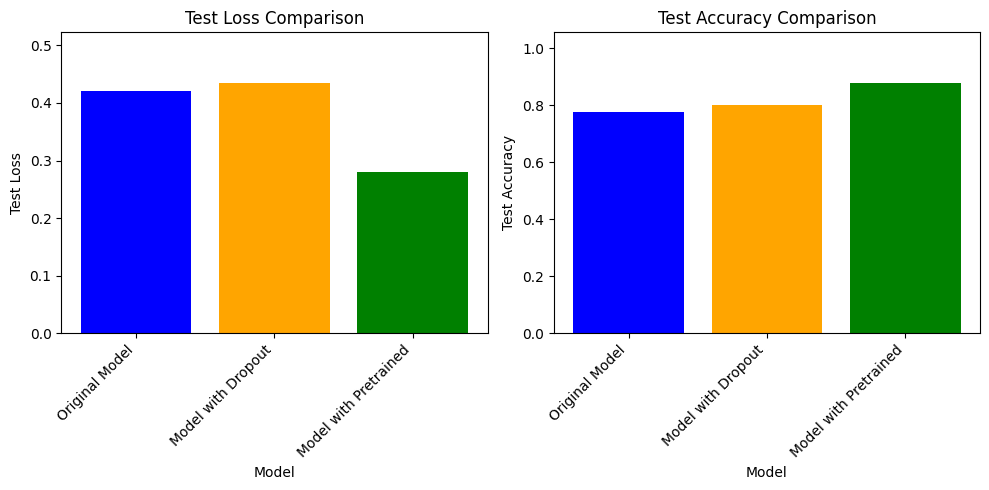

In [ ]:
import matplotlib.pyplot as plt

# Test loss and accuracy values for all three models
test_loss_values = [test_loss, test_loss_2, test_loss_3]
test_accuracy_values = [test_accuracy, test_accuracy_2, test_accuracy_3]

# Model names for labeling
model_names = ['Original Model', 'Model with Dropout', 'Model with Pretrained']

# Plot test loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(model_names, test_loss_values, color=['blue', 'orange', 'green'])
plt.xlabel('Model')
plt.ylabel('Test Loss')
plt.title('Test Loss Comparison')
plt.ylim(0, max(test_loss_values) * 1.2)
# Rotate x-axis labels diagonally
plt.xticks(rotation=45, ha='right')

# Plot test accuracy
plt.subplot(1, 2, 2)
plt.bar(model_names, test_accuracy_values, color=['blue', 'orange', 'green'])
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy Comparison')
plt.ylim(0, max(test_accuracy_values) * 1.2)
# Rotate x-axis labels diagonally
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


## **Model Testing with Sample Images**
 Here we test our model using sample images from a Normal and Pneumonia class and the model accurately predicted the classes

In [ ]:
# For this part, we will first have to save or model

model.save('model_3.h5')

In [ ]:
# Predicting using Normal Image

saved_model = load_model('./model_3.h5')  # Loading your model

image_path = os.path.join(os.getcwd(), '/content/drive/MyDrive/chest_xray/chest_xray/test/NORMAL/IM-0001-0001.jpeg')
img = image.load_img(image_path, target_size=(224, 224))
image_array = image.img_to_array(img)  # Converting the X-Ray into pixels
image_array = np.expand_dims(image_array, axis=0)
img_data = preprocess_input(image_array)

prediction = saved_model.predict(img_data)

if prediction[0][0] > prediction[0][1]:
    print('Person is safe.')
else:
    print('Person is affected with Pneumonia.')

print(f'Predictions: {prediction}')

1/1 [==============================] - 0s 142ms/step
Person is safe.
Predictions: [[9.9999976e-01 2.2612915e-07]]


In [ ]:
# Predicting using Pneumonia Image

saved_model = load_model('./model_3.h5')  # Loading your model

image_path = os.path.join(os.getcwd(), '/content/drive/MyDrive/chest_xray/chest_xray/test/PNEUMONIA/person121_bacteria_576.jpeg')
img = image.load_img(image_path, target_size=(224, 224))
image_array = image.img_to_array(img)  # Converting the X-Ray into pixels
image_array = np.expand_dims(image_array, axis=0)
img_data = preprocess_input(image_array)

prediction = saved_model.predict(img_data)

if prediction[0][0] > prediction[0][1]:
    print('Person is safe.')
else:
    print('Person is affected with Pneumonia.')

print(f'Predictions: {prediction}')

1/1 [==============================] - 0s 96ms/step
Person is affected with Pneumonia.
Predictions: [[0.1569414 0.8430586]]


# **Conclusion**

---



### **Understanding Variations in Test Results**
The variations in the test results among the different models can be attributed to various factors that influence their performance:

**Original Model** - The original model's test accuracy of **0.78** and test loss of **0.42** might have been influenced by the following factors:

- *Model Complexity:* The original model's architecture might not have been complex enough to capture intricate patterns within the data, leading to suboptimal performance.

-  *Overfitting:* Without regularization techniques like dropout, the original model could have overfit the training data, resulting in reduced generalization ability and higher test loss.

**Model with Dropout** - The model with dropout exhibited improvements with a test accuracy of **0.79** and test loss of **0.43**. These variations might be attributed to:

- *Regularization:* The inclusion of dropout layers helps prevent overfitting by introducing randomness during training. While the test accuracy improved, it's possible that further hyperparameter tuning could enhance the model's performance.

- *Reduced Overfitting:* Dropout's regularization effect could have aided the model in generalizing better to unseen data, leading to the observed reduction in test loss.

**Model with Pretrained**(*preferred model*) - The model with transfer learning from a pre-trained base model yielded impressive results with a test accuracy of **0.88511** and a test loss of **0.2814374566078186**:

- *Feature Extraction:* Leveraging the pre-trained features of the VGG16 model enabled the model to capture rich and relevant image features, enhancing its ability to discriminate between classes.

- *Generalization:* The base model's pre-trained features were likely learned from a vast dataset, enabling the model to generalize well to the new task, resulting in the significant increase in test accuracy.


In summary, variations in test results can be attributed to differences in model architectures, regularization techniques, and the use of pre-trained features. Careful consideration of these factors and potential hyperparameter tuning can lead to improved model performance.

# **Recommendations**
The developed deep learning model (Model with Pretained) will offer several advantages to the healthcare industry:

**Efficient Diagnosis:** The model can rapidly process and analyze chest X-ray images to provide a binary diagnosis (pneumonia or non-pneumonia). This speed can lead to quicker decisions and treatment initiation.

**Accuracy Improvement:** The model has the ability to learn complex patterns and features in images that might not be easily discernible by human experts. This could lead to more accurate diagnoses.

**Reduction of Human Error:** By automating the diagnosis process, the model can help reduce the likelihood of human errors that occur in the manual interpretation of medical images.

**Scalability:** The model can be used to analyze a large number of images quickly and consistently, making it suitable for high-throughput scenarios.
